# Final Project - Predicting Spam Emails

In [1]:
# Loading required packages
import pandas as pd
from myFinalProjectFunctions import isSpam, text_process, check_spam_phrase
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import string
import re
from collections import Counter
from spellchecker import SpellChecker
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading the data
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [18]:
t = isSpam(df['text'])
t.get_common_words(2)

[[('this', 2), ('is', 2)],
 [('hplnol', 2), ('xls', 2)],
 [('the', 25), ('and', 17)],
 [('abasements', 1), ('darer', 1)],
 [('ect', 6), ('hou', 4)],
 [('the', 7), ('ehronline', 5)],
 [('the', 9), ('locker', 8)],
 [('it', 3), ('is', 3)],
 [('texas', 3), ('utilities', 3)],
 [('hplnl', 2), ('xls', 2)],
 [('the', 34), ('to', 28)],
 [('to', 2), ('of', 2)],
 [('enron', 2), ('hpl', 2)],
 [('berne', 1), ('hotbox', 1)],
 [('the', 4), ('darren', 1)],
 [('the', 74), ('of', 56)],
 [('ect', 83), ('hou', 46)],
 [('the', 5), ('enron', 5)],
 [('the', 4), ('please', 4)],
 [('molly', 4), ('to', 3)],
 [('the', 14), ('may', 9)],
 [('mm', 8), ('for', 6)],
 [('hplnol', 2), ('xls', 2)],
 [('i', 1), ('don', 1)],
 [('the', 61), ('and', 37)],
 [('enron', 15), ('com', 10)],
 [('you', 16), ('your', 11)],
 [('the', 3), ('is', 2)],
 [('to', 7), ('it', 7)],
 [('ect', 13), ('hou', 9)],
 [('the', 14), ('we', 8)],
 [('hpl', 3), ('teco', 1)],
 [('your', 5), ('the', 5)],
 [('ect', 15), ('hou', 11)],
 [('deal', 8), ('path

Need to filter out stop words. 

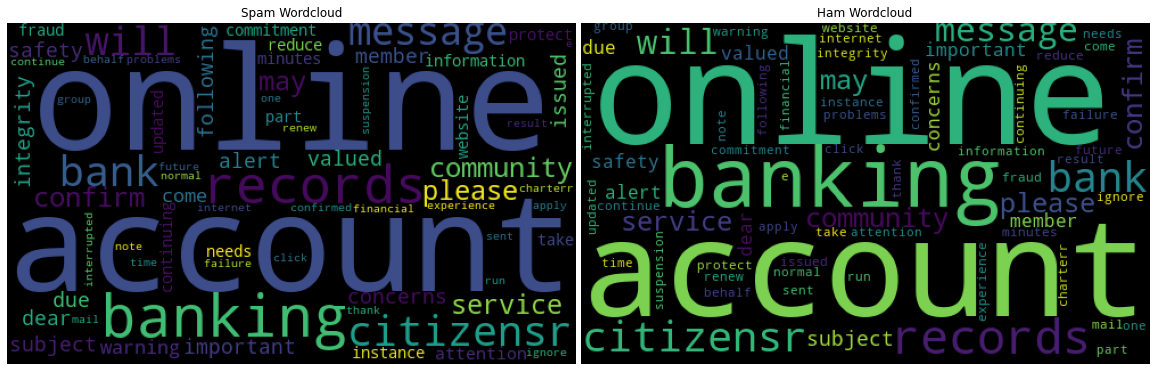

(<wordcloud.wordcloud.WordCloud at 0x7fdf46029d60>,
 <wordcloud.wordcloud.WordCloud at 0x7fdf460299d0>)

In [4]:
check_spam_phrase(df)

So both classes have similar wordcloud, just give up the features of manual statistics and directly tf-idf vectorize it.

In [5]:
x = t.text_data
y = df['label_num']
x = df['text'].apply(text_process) # pandas apply, a little faster than basic for loop

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(x)
vectors.shape

(5171, 50342)

In [7]:
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.2, random_state=1024)

In [9]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [10]:
clfs = {'SVC' : svc,'K-Neighbors' : knc, 'Multinomial NB': mnb, 'Decision Tree': dtc, 'Linear Reg': lrc, 'Random Forest': rfc}

In [11]:
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [12]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, accuracy_score(y_test , pred)))

In [13]:
pred_scores_word_vectors

[('SVC', 0.9884057971014493),
 ('K-Neighbors', 0.9632850241545894),
 ('Multinomial NB', 0.9758454106280193),
 ('Decision Tree', 0.9516908212560387),
 ('Linear Reg', 0.9458937198067633),
 ('Random Forest', 0.9729468599033816)]

The Multinomial Naive Bayes result of 0.97 can be verified and similar to: 
https://www.kaggle.com/code/ansarisakib/spam-mail-dectection-by-naive-bayes

The Support Vector Classifier result of 0.98 can be verified is similar to:
https://www.kaggle.com/code/alaatahaelmaria/emails-classification-ham-or-spam

In [14]:
def check(text, pred):
    for i in range(len(pred)):
        if pred[i] == 1:
            print ("SPAM" + ": " + text[i] + '\n')
        else:
            print ("NOT Spam" + ": " + text[i] + '\n')

## Playing around:

In [15]:
new_text = [df['text'][0], df['text'][1], df['text'][3],'USC can beat UCLA']
input_test = vectorizer.transform(new_text)
output_test = predict(dtc, input_test)
check(new_text, output_test)

NOT Spam: Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .

NOT Spam: Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls

SPAM: Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin


SPAM: USC can beat UCLA



In [16]:
output_test = predict(mnb, input_test) # mnb gets a non-friendly prediction
check(new_text, output_test)

NOT Spam: Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .

NOT Spam: Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls

SPAM: Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin


NOT Spam: USC can beat UCLA

